# Multilayer Perceptron Model (MLP)

### PS1.A and PS1.B

The task assigned to us is to develop a Time Series forecasting model to predict future retail sales. We are to take the original code provided to us, and replace the MLP with a CNN network instead.

## Import Libraries

In [31]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
#Imported necessary libraries
import numpy as np
import requests
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, Flatten



#configures the notebook to display plots in the notebook rather than in a separate window
%matplotlib inline
#improves resolution of the plots
%config InlineBackend.figure_format='retina' 
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10

## Data

In [54]:
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1139&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=RSXFSN&scale=left&cosd=1992-01-01&coed=2023-03-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-05-08&revision_date=2023-05-08&nd=1992-01-01"
r = requests.get(url)
open = open("RSXFSN.csv", "wb").write(r.content)


In [51]:
# Store data in DataFrame
df = pd.read_csv("RSXFSN.csv")

In [52]:
# keep real GDP only
keep_columns = ['RSXFSN']
df = df[keep_columns]
# rescale
df = df/10000

## Data Preprocessing

In [53]:
# split train & test data
n_train = int(len(df) * 0.8) #calculates the number of training samples by taking 80% of the dataframe 
n_test = len(df) - n_train #calculates the remaining 20%
train, test = df.iloc[0:n_train], df.iloc[n_train:len(df)] #splits the dataframe into training and testing sets
print(len(train), len(test))

300 75


In [37]:
def get_timeseries(x, n_steps=1):
    x_ts, y_ts = [], [] #input features and output labels
    for ii in range(len(x) - n_steps): #iterates over the input data minus the number of steps n_steps
        v = x.iloc[ii:(ii + n_steps)].values #creates a slice from the index ii until the index ii+n_steps. Extracts the values in that slice and stores them in v
        x_ts.append(v) #appends v to the input features list
        w = x.iloc[ii + n_steps].values #extracts the output value at ii+n_steps and stores it in w
        y_ts.append(w) #appends the output label
    return np.array(x_ts), np.array(y_ts)

In [38]:
n_steps = 16
n_features = 1

# convert to a time series dimension: [samples, n_steps, n_features]

x_train, y_train = get_timeseries(train, n_steps) #generates input features x_train and output labels y_train
x_test, y_test = get_timeseries(test,n_steps) #does the same but for the testing data

print(x_train.shape, y_train.shape)

(284, 16, 1) (284, 1)


## Modeling

In [39]:
# define model
model = Sequential() #initializes a new sequential model
model.add(Dense(50, activation='relu', input_dim=n_steps)) #dense layer added with 50 neurons, rectified linear unit, and an input dimension of size n_steps
model.add(Dense(1)) #another dense layer of 1 input neuron that is responsible for producing the final prediction for the next step
model.compile(loss='mean_squared_error', optimizer=Adam(0.001)) #specifies the loss function to mean squared error and optimizer to Adam with a learning rate of 0.001

## Training

In [40]:
# fit model
history = model.fit(x_train, y_train,epochs=500,batch_size=32,validation_split=0.1,verbose=1,shuffle=False) #fits the model to the training data 

Epoch 1/500
8/8 [==============================] - 1s 22ms/step - loss: 30.3552 - val_loss: 33.7049
Epoch 2/500
8/8 [==============================] - 0s 6ms/step - loss: 16.3801 - val_loss: 9.4400
Epoch 3/500
8/8 [==============================] - 0s 6ms/step - loss: 9.9334 - val_loss: 16.8469
Epoch 4/500
8/8 [==============================] - 0s 5ms/step - loss: 5.7640 - val_loss: 10.8516
Epoch 5/500
8/8 [==============================] - 0s 8ms/step - loss: 5.1718 - val_loss: 7.6240
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 4.5323 - val_loss: 7.4330
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 4.0280 - val_loss: 6.7743
Epoch 8/500
8/8 [==============================] - 0s 6ms/step - loss: 3.6104 - val_loss: 6.3222
Epoch 9/500
8/8 [==============================] - 0s 5ms/step - loss: 3.5335 - val_loss: 6.0756
Epoch 10/500
8/8 [==============================] - 0s 5ms/step - loss: 3.4712 - val_loss: 5.9745
Epoch 11/500
8/8 [=====

## Evaluation

In [41]:
y_pred = model.predict(x_test) #newly trained model is used to predict the test data's output

2/2 [==============================] - 0s 4ms/step


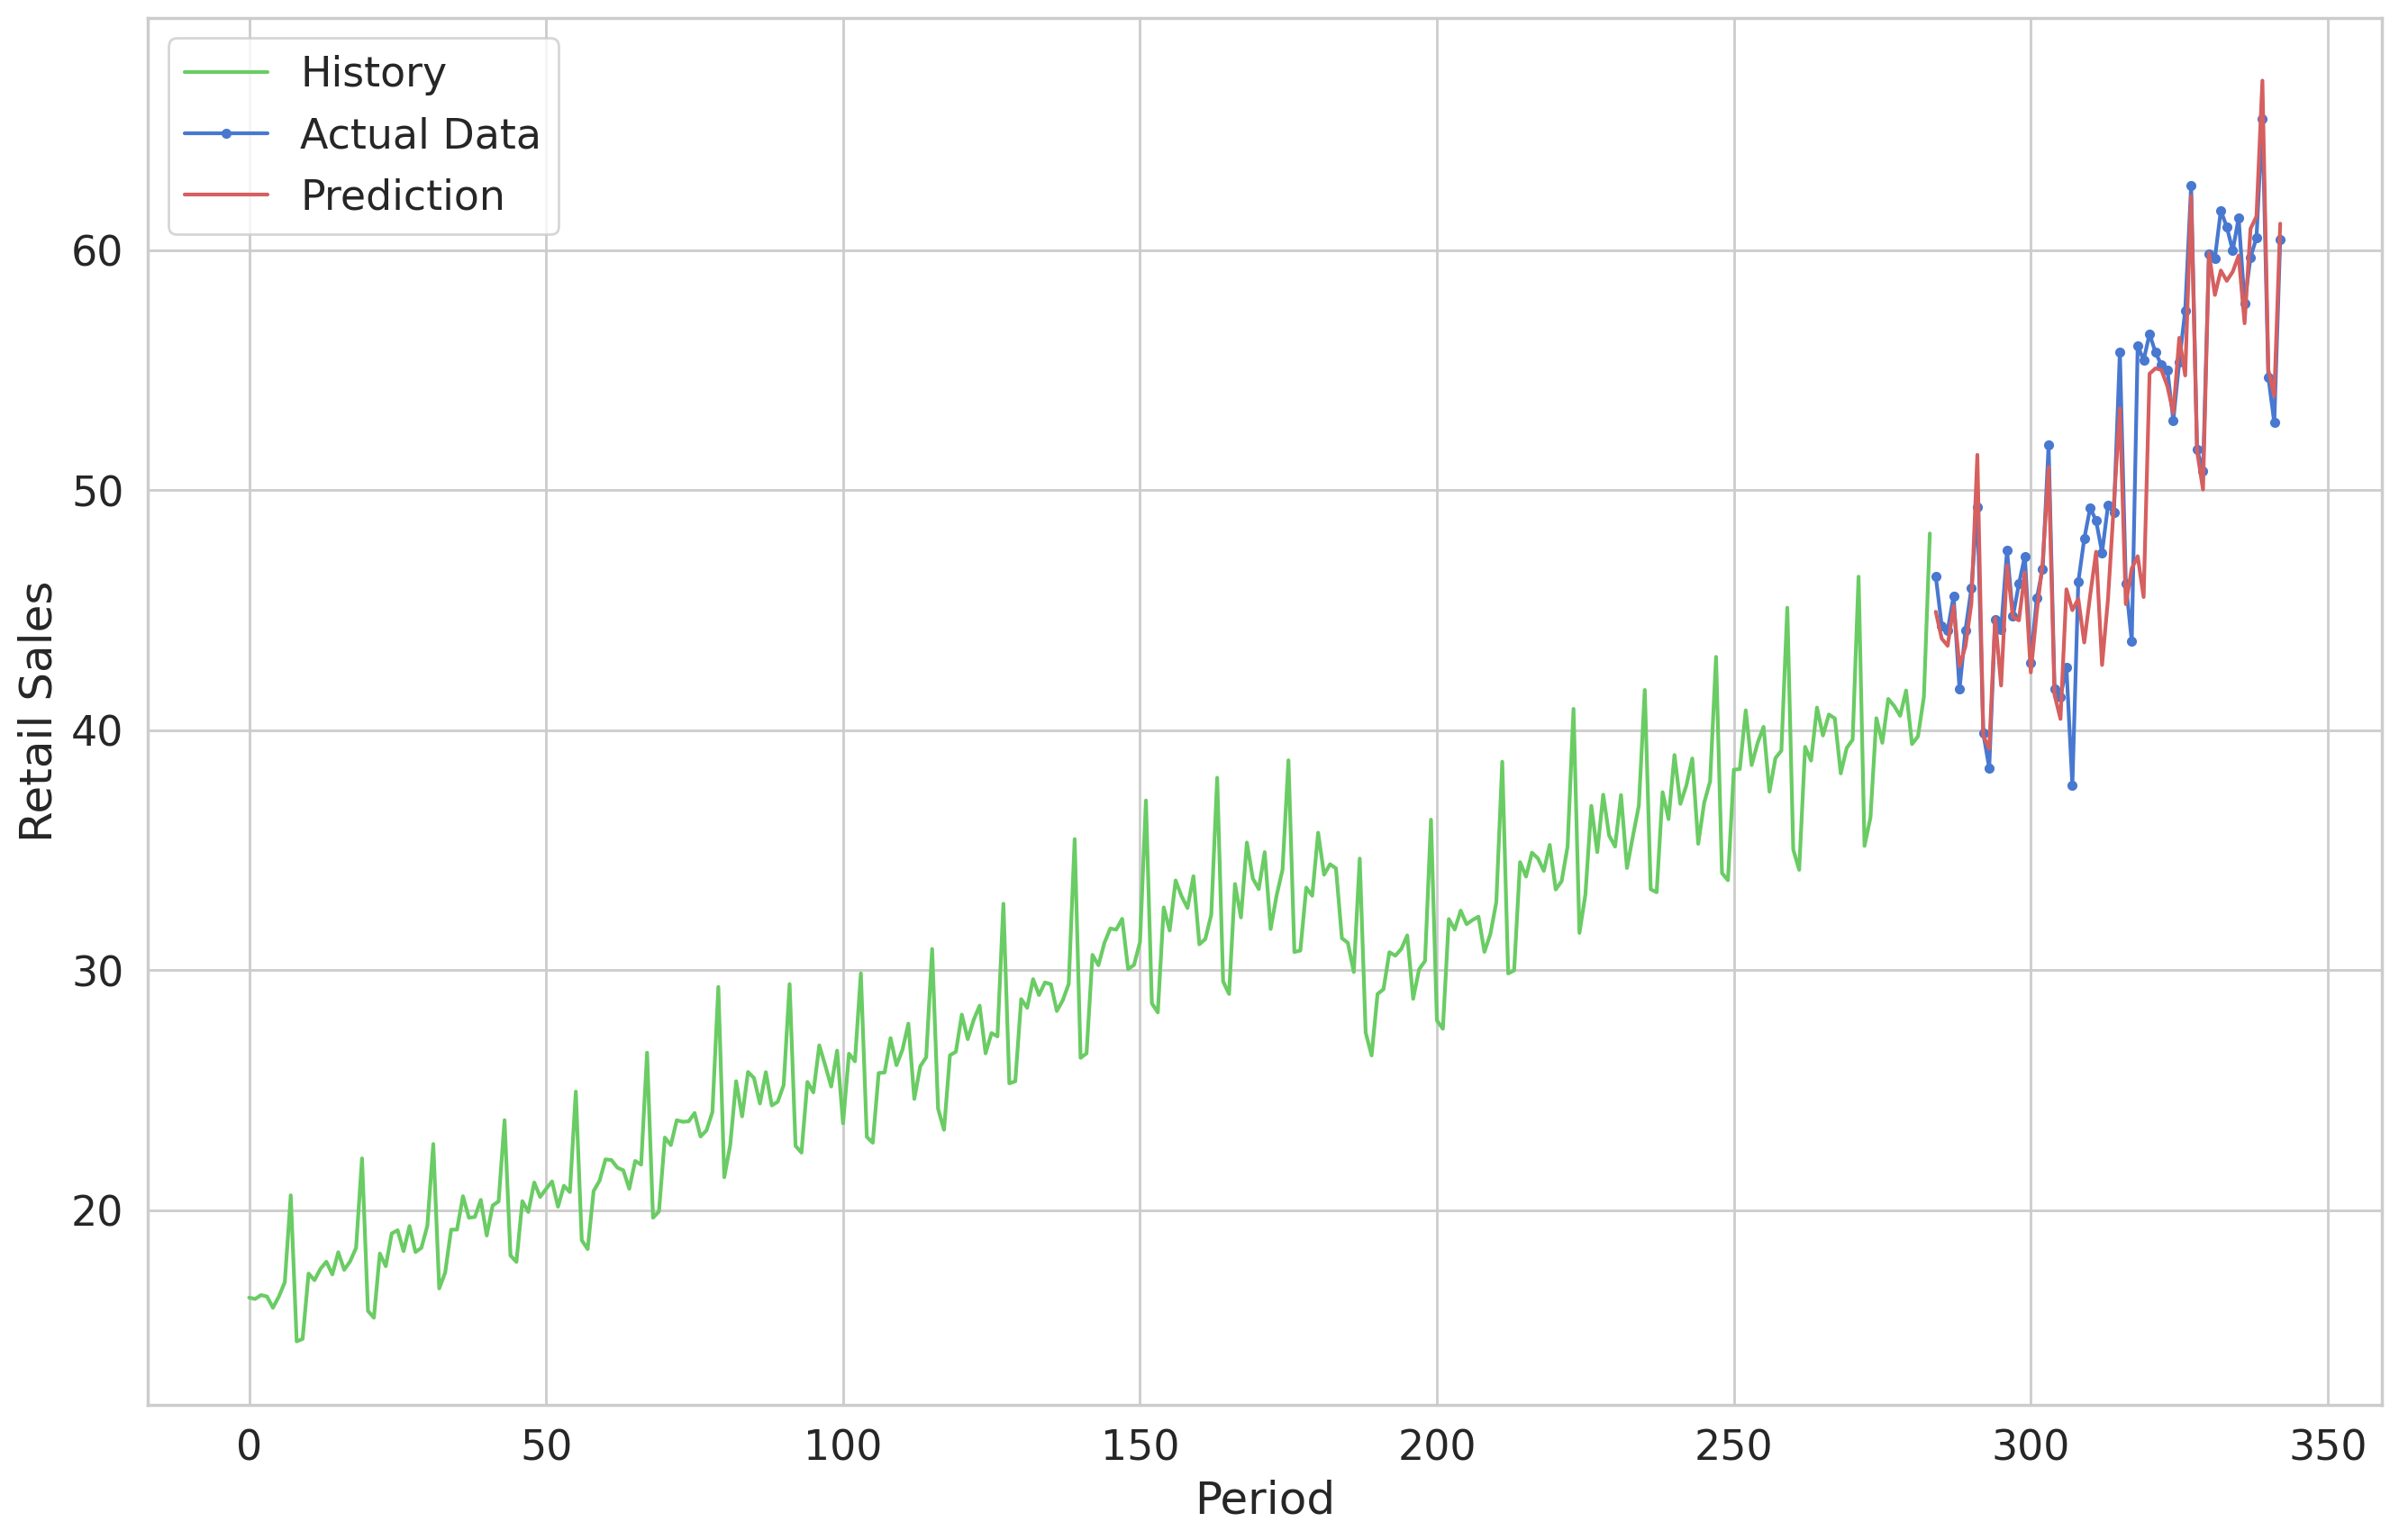

In [42]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Actual Data")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

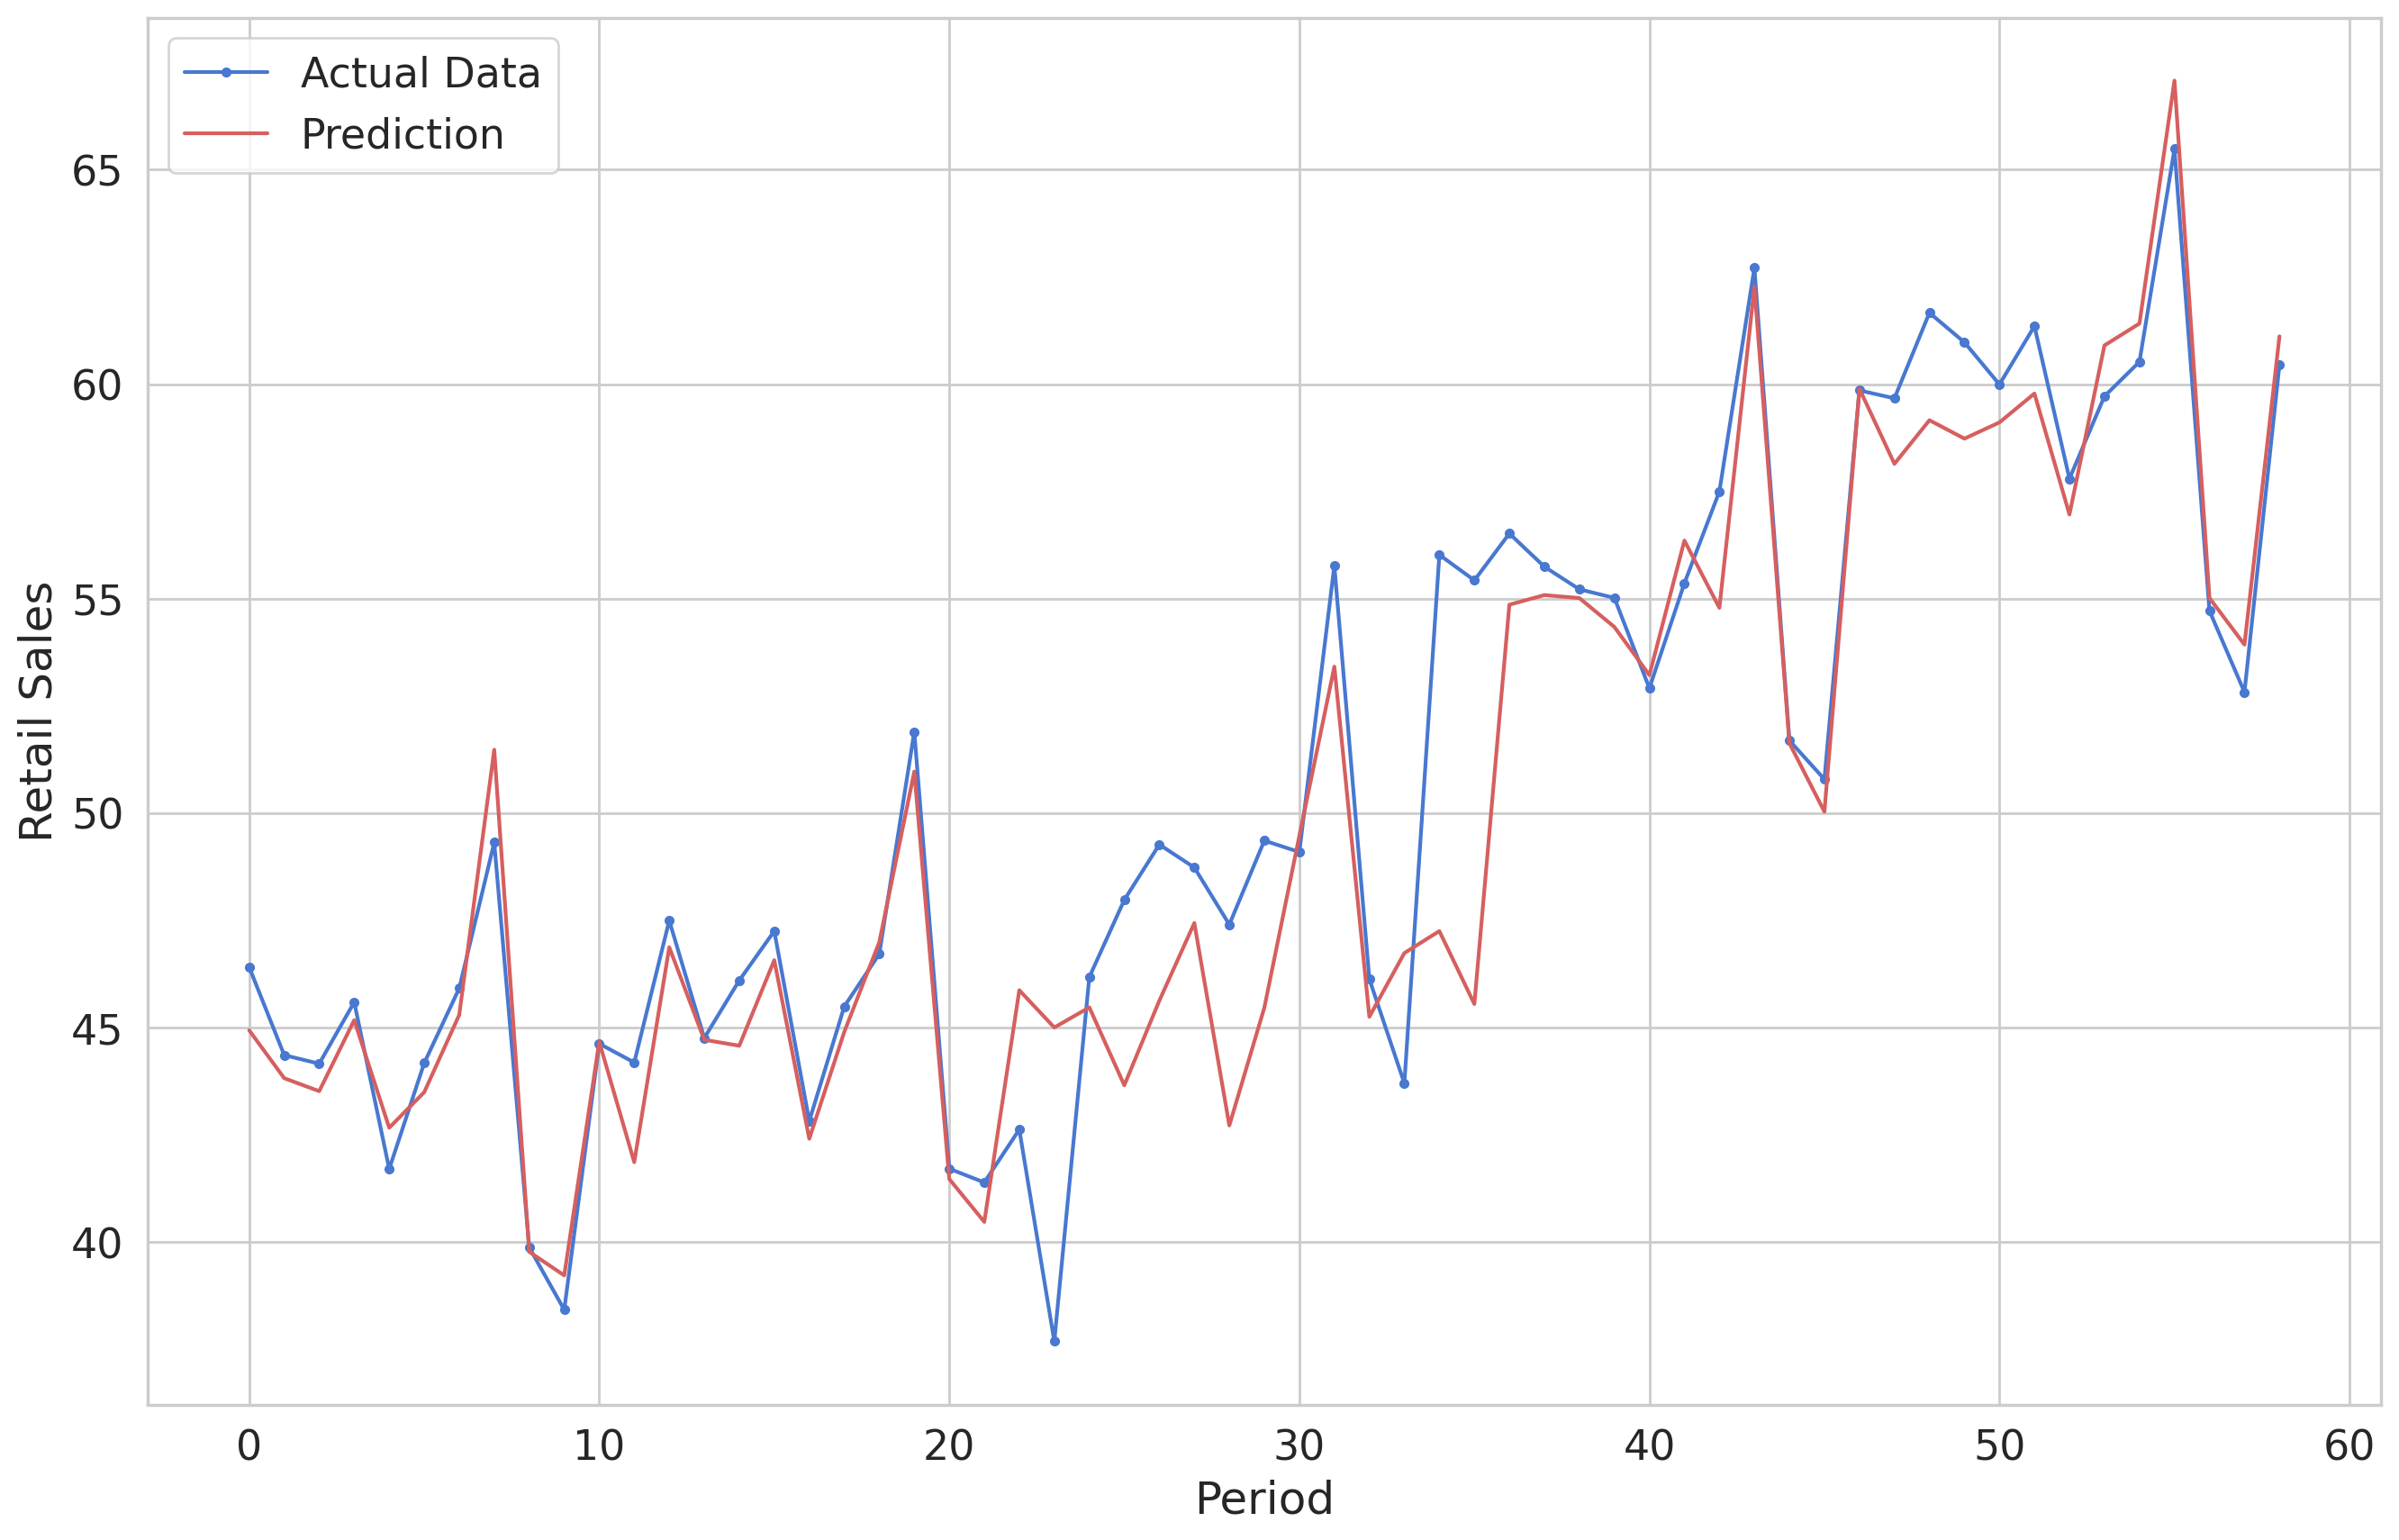

In [43]:
plt.plot(y_test, marker='.', label="Actual Data")
plt.plot(y_pred, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

#Convolutional Neural Network (CNN)

### PS1.C and PS1.D

In [44]:
cnn_model = Sequential() #Creates a new sequential model
cnn_model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features))) #adds 1-dimensional convolutional layer, containing 64 filters, kernel size of 2, rectified linear unit activation function and the input shape.
cnn_model.add(Conv1D(64, kernel_size=2, activation='relu'))
cnn_model.add(Flatten()) #flattening of the multidimensional output from the previous layer
cnn_model.add(Dense(1)) #Similar to in the MLP this dense layer is responsible for making the final prediction.
cnn_model.compile(loss='mean_squared_error', optimizer=Adam(0.001)) #loss function is set to mean_squared_error and optimizer is set to adam with a learning rate of 0.001

cnn = cnn_model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split=0.1, verbose=1, shuffle=False)
y_pred_cnn = cnn_model.predict(x_test)


Epoch 1/500
8/8 [==============================] - 1s 27ms/step - loss: 424.6190 - val_loss: 263.6989
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 29.8527 - val_loss: 80.2676
Epoch 3/500
8/8 [==============================] - 0s 7ms/step - loss: 45.3515 - val_loss: 25.3592
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 10.6048 - val_loss: 32.5570
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 11.7673 - val_loss: 9.5368
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 7.2675 - val_loss: 13.1202
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 5.1823 - val_loss: 8.6588
Epoch 8/500
8/8 [==============================] - 0s 7ms/step - loss: 5.2867 - val_loss: 8.9917
Epoch 9/500
8/8 [==============================] - 0s 7ms/step - loss: 4.9843 - val_loss: 8.6082
Epoch 10/500
8/8 [==============================] - 0s 7ms/step - loss: 4.8612 - val_loss: 8.2965
Epoch 11/500
8/8

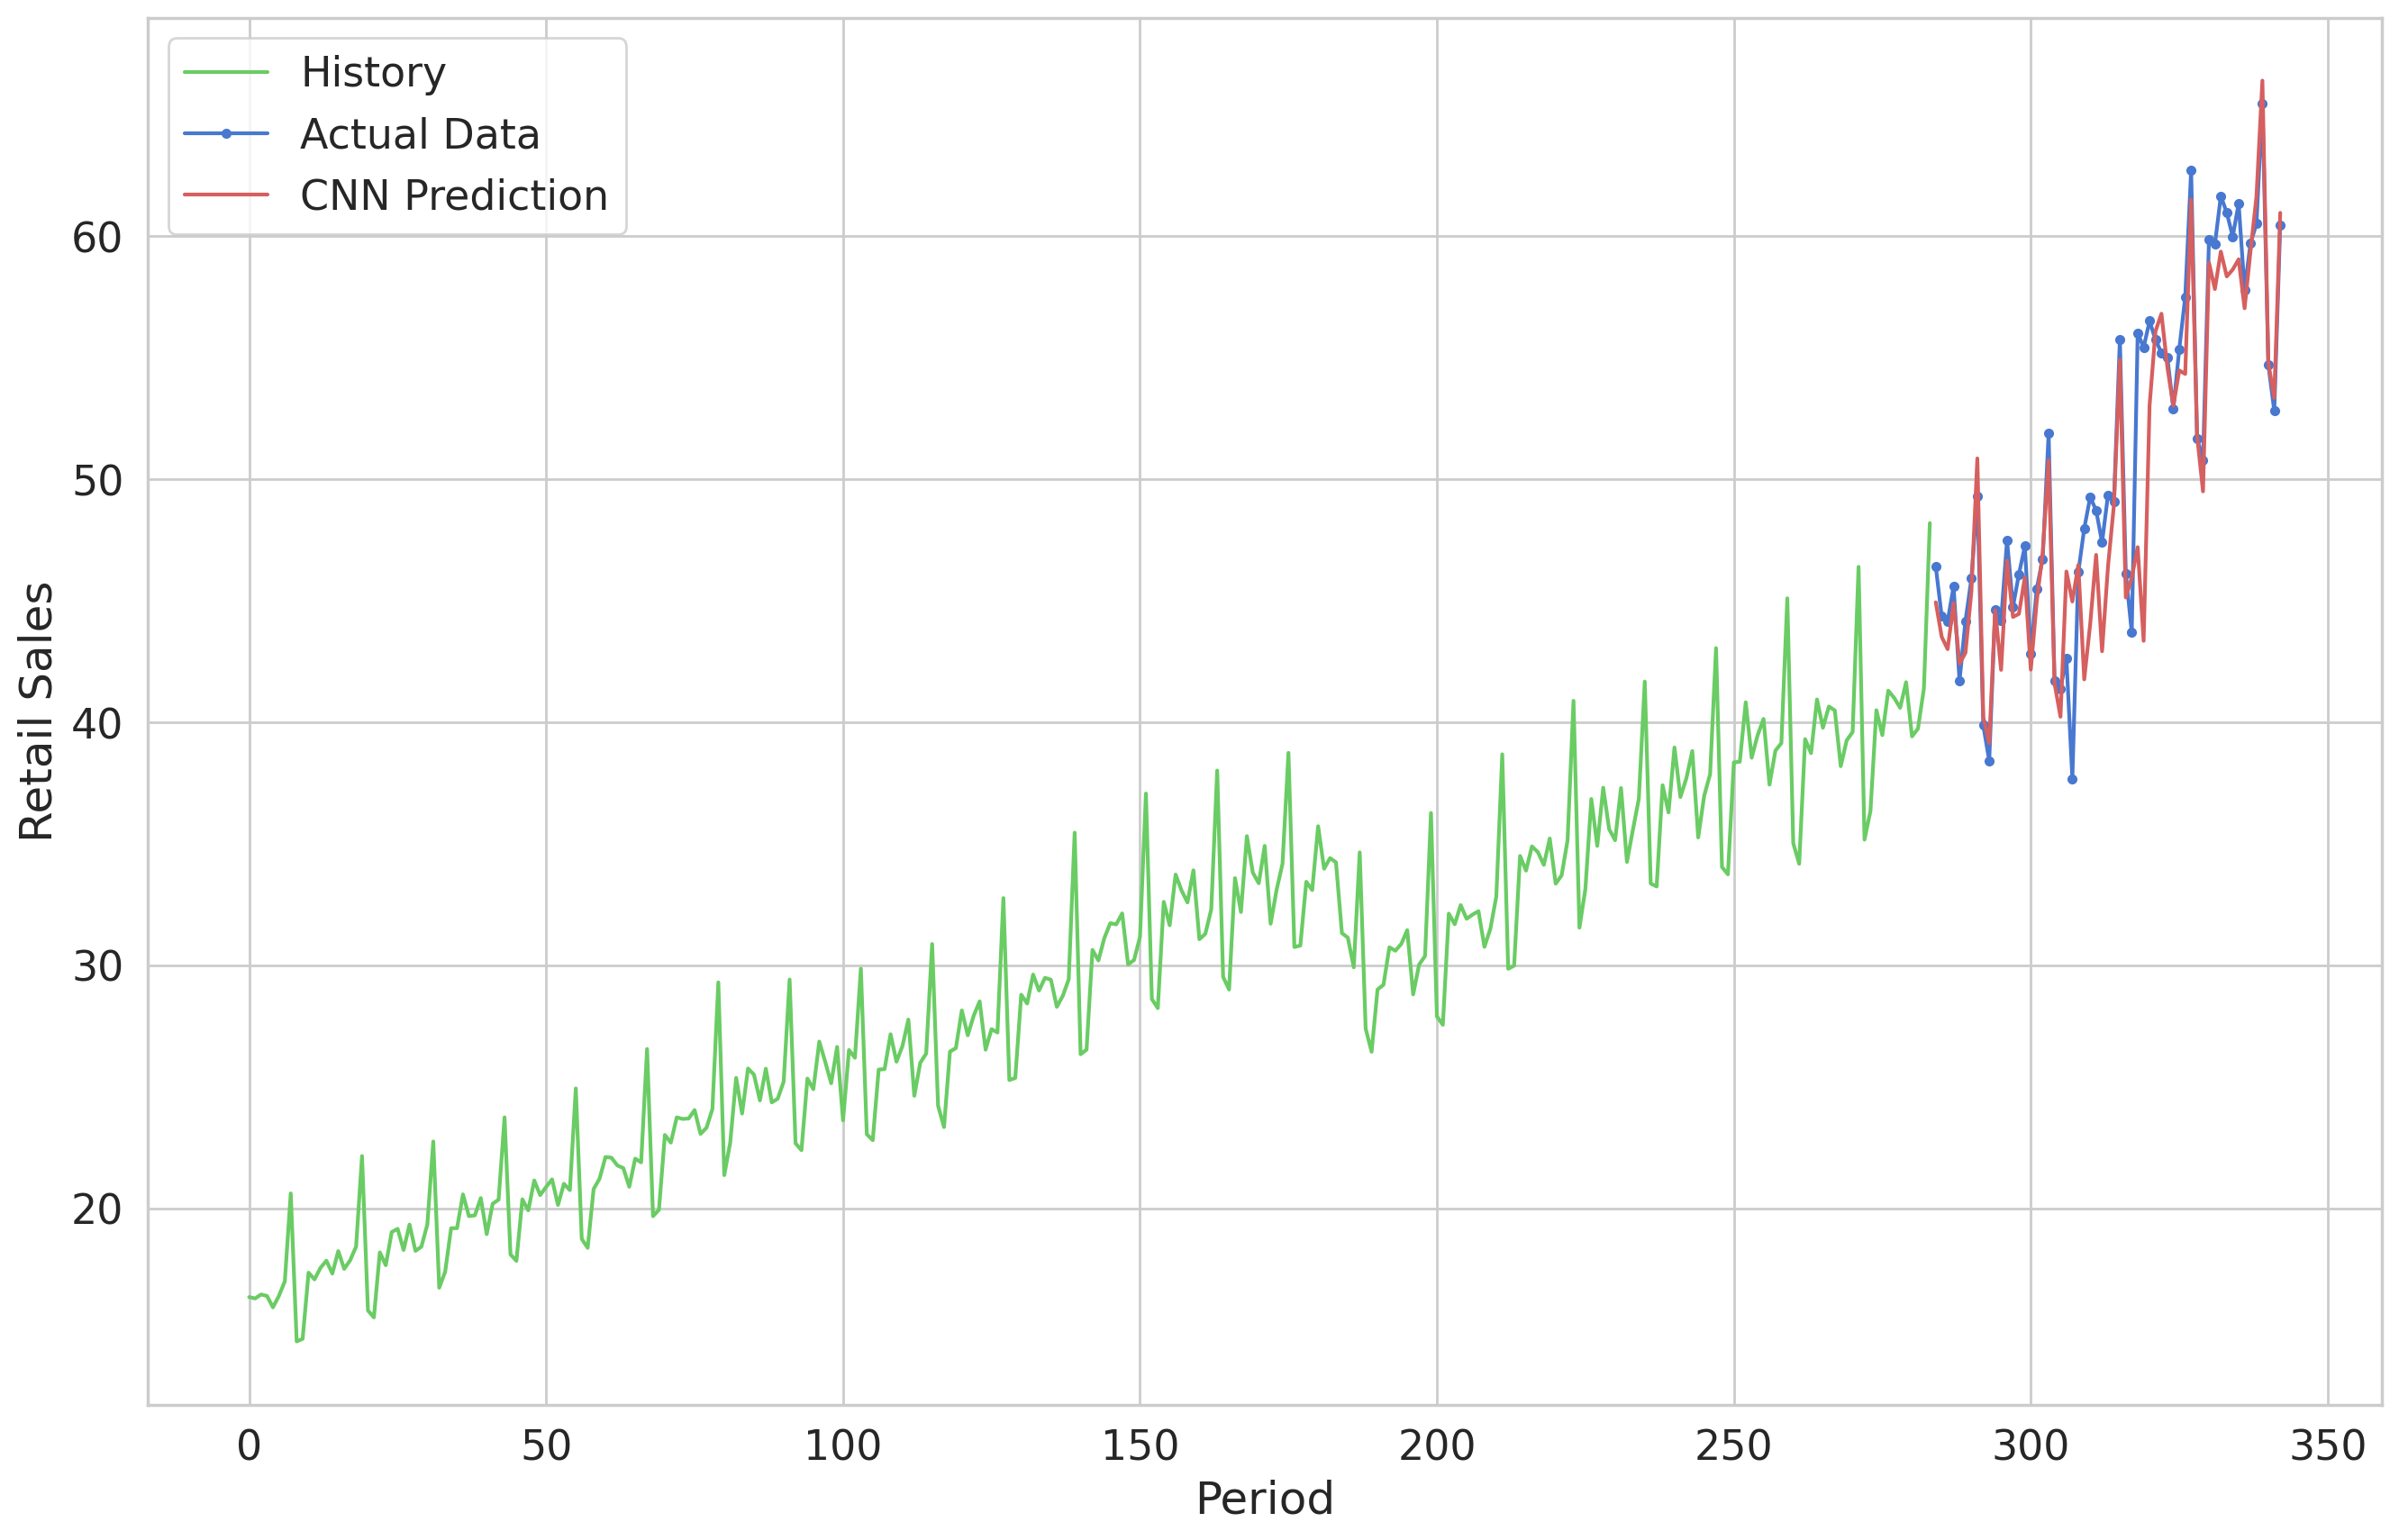

In [45]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Actual Data")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_cnn, 'r', label="CNN Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

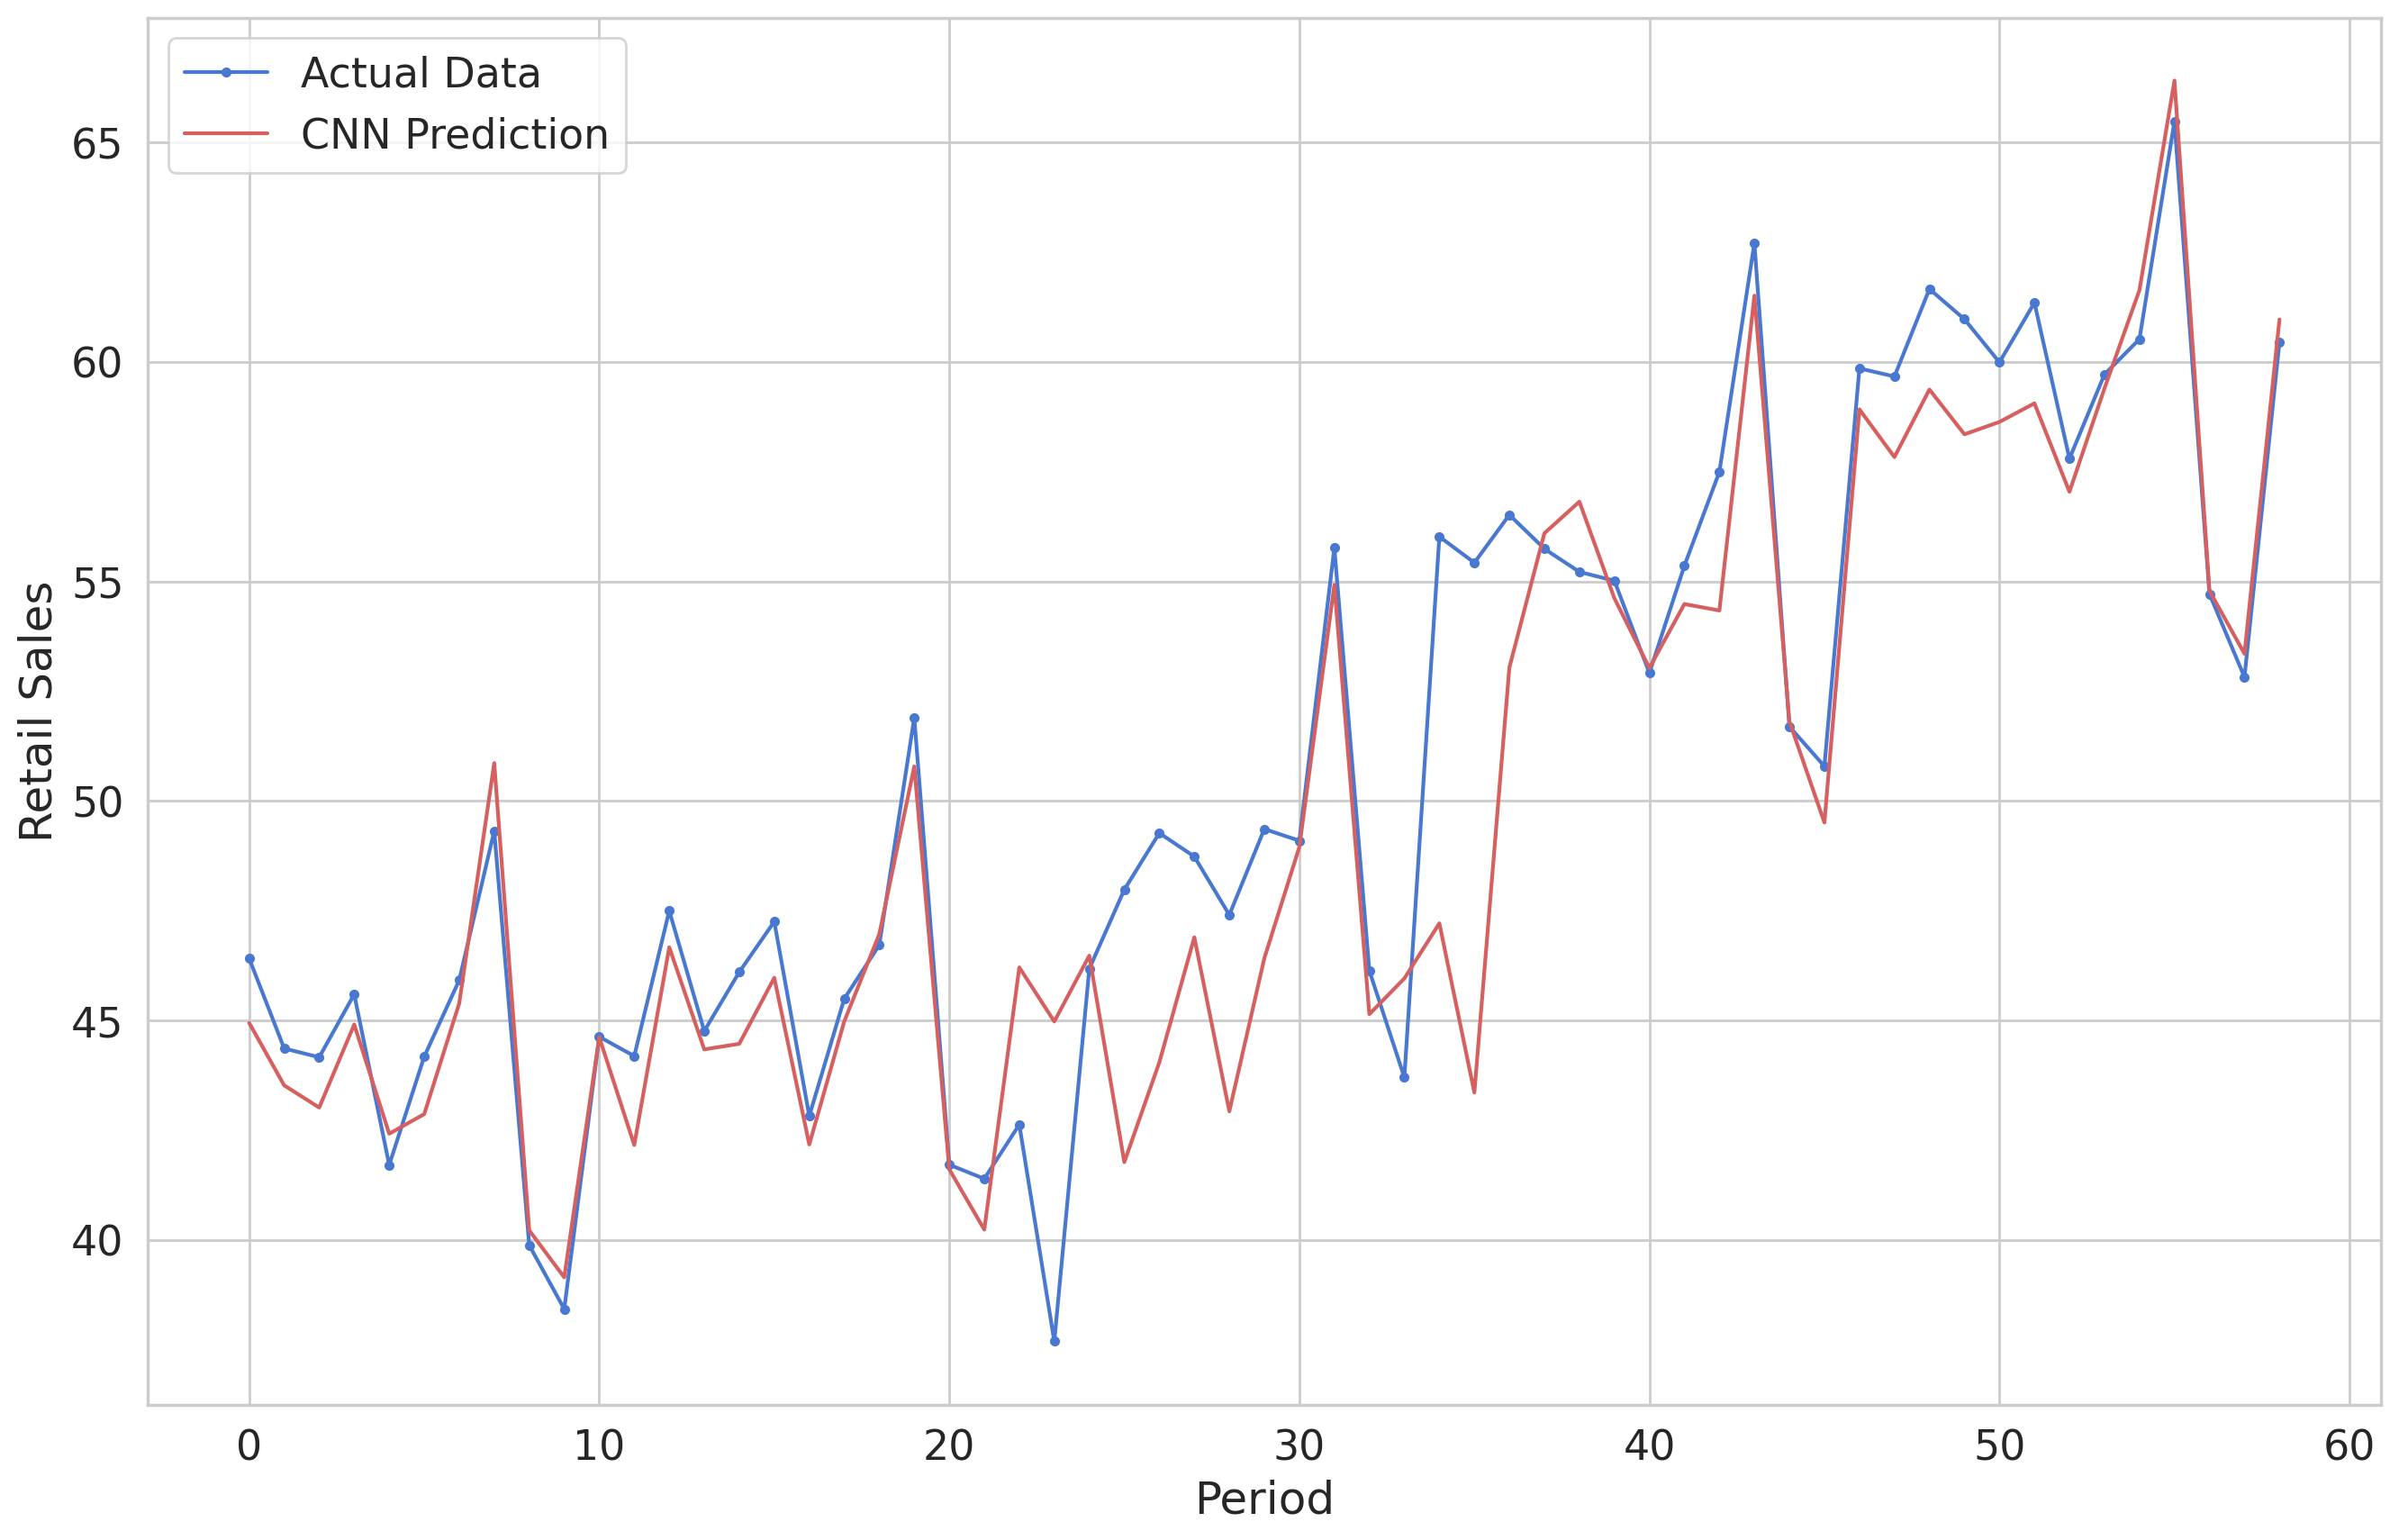

In [46]:
plt.plot(y_test, marker='.', label="Actual Data")
plt.plot(y_pred_cnn, 'r', label="CNN Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

#Comparison

The mean squared error (MSE) and R2 coefficient presented below exhibit very similar values for both the CNN and MLP models. Upon running the notebook multiple times, it has been observed that the CNN model tends to perform marginally better than the MLP model in terms of MSE, while the R² coefficients remain nearly identical each time. This small difference is likely not enough to say that the CNN model is more efficient than the MLP model. The slightly improved performance of the CNN model could be attributed to its ability to capture local patterns, which may result in a better fit in certain areas of the time series. However, these minor improvements might not be significant enough to influence the R² scores. Overall there is very little difference, performatively, between the two models.  


In [47]:
mse_mlp = mean_squared_error(y_test, y_pred) # Calculate MSE for the MLP model
mse_cnn = mean_squared_error(y_test, y_pred_cnn) # Calculate MSE for the CNN model

print(f"Mean Squared Error (Original Model): {mse_mlp:.5f}")
print(f"Mean Squared Error (CNN Model): {mse_cnn:.5f}")

Mean Squared Error (Original Model): 6.49895
Mean Squared Error (CNN Model): 8.00733


In [48]:
r2_mlp = r2_score(y_test, y_pred) #Calculate R2 for MLP model
r2_cnn = r2_score(y_test, y_pred_cnn) #Calculate R2 for CNN layer

print(f"R2 Score (MLP Model): {r2_mlp:.5f}")
print(f"R2 Score (CNN Model): {r2_cnn:.5f}")

R2 Score (MLP Model): 0.86656
R2 Score (CNN Model): 0.83559


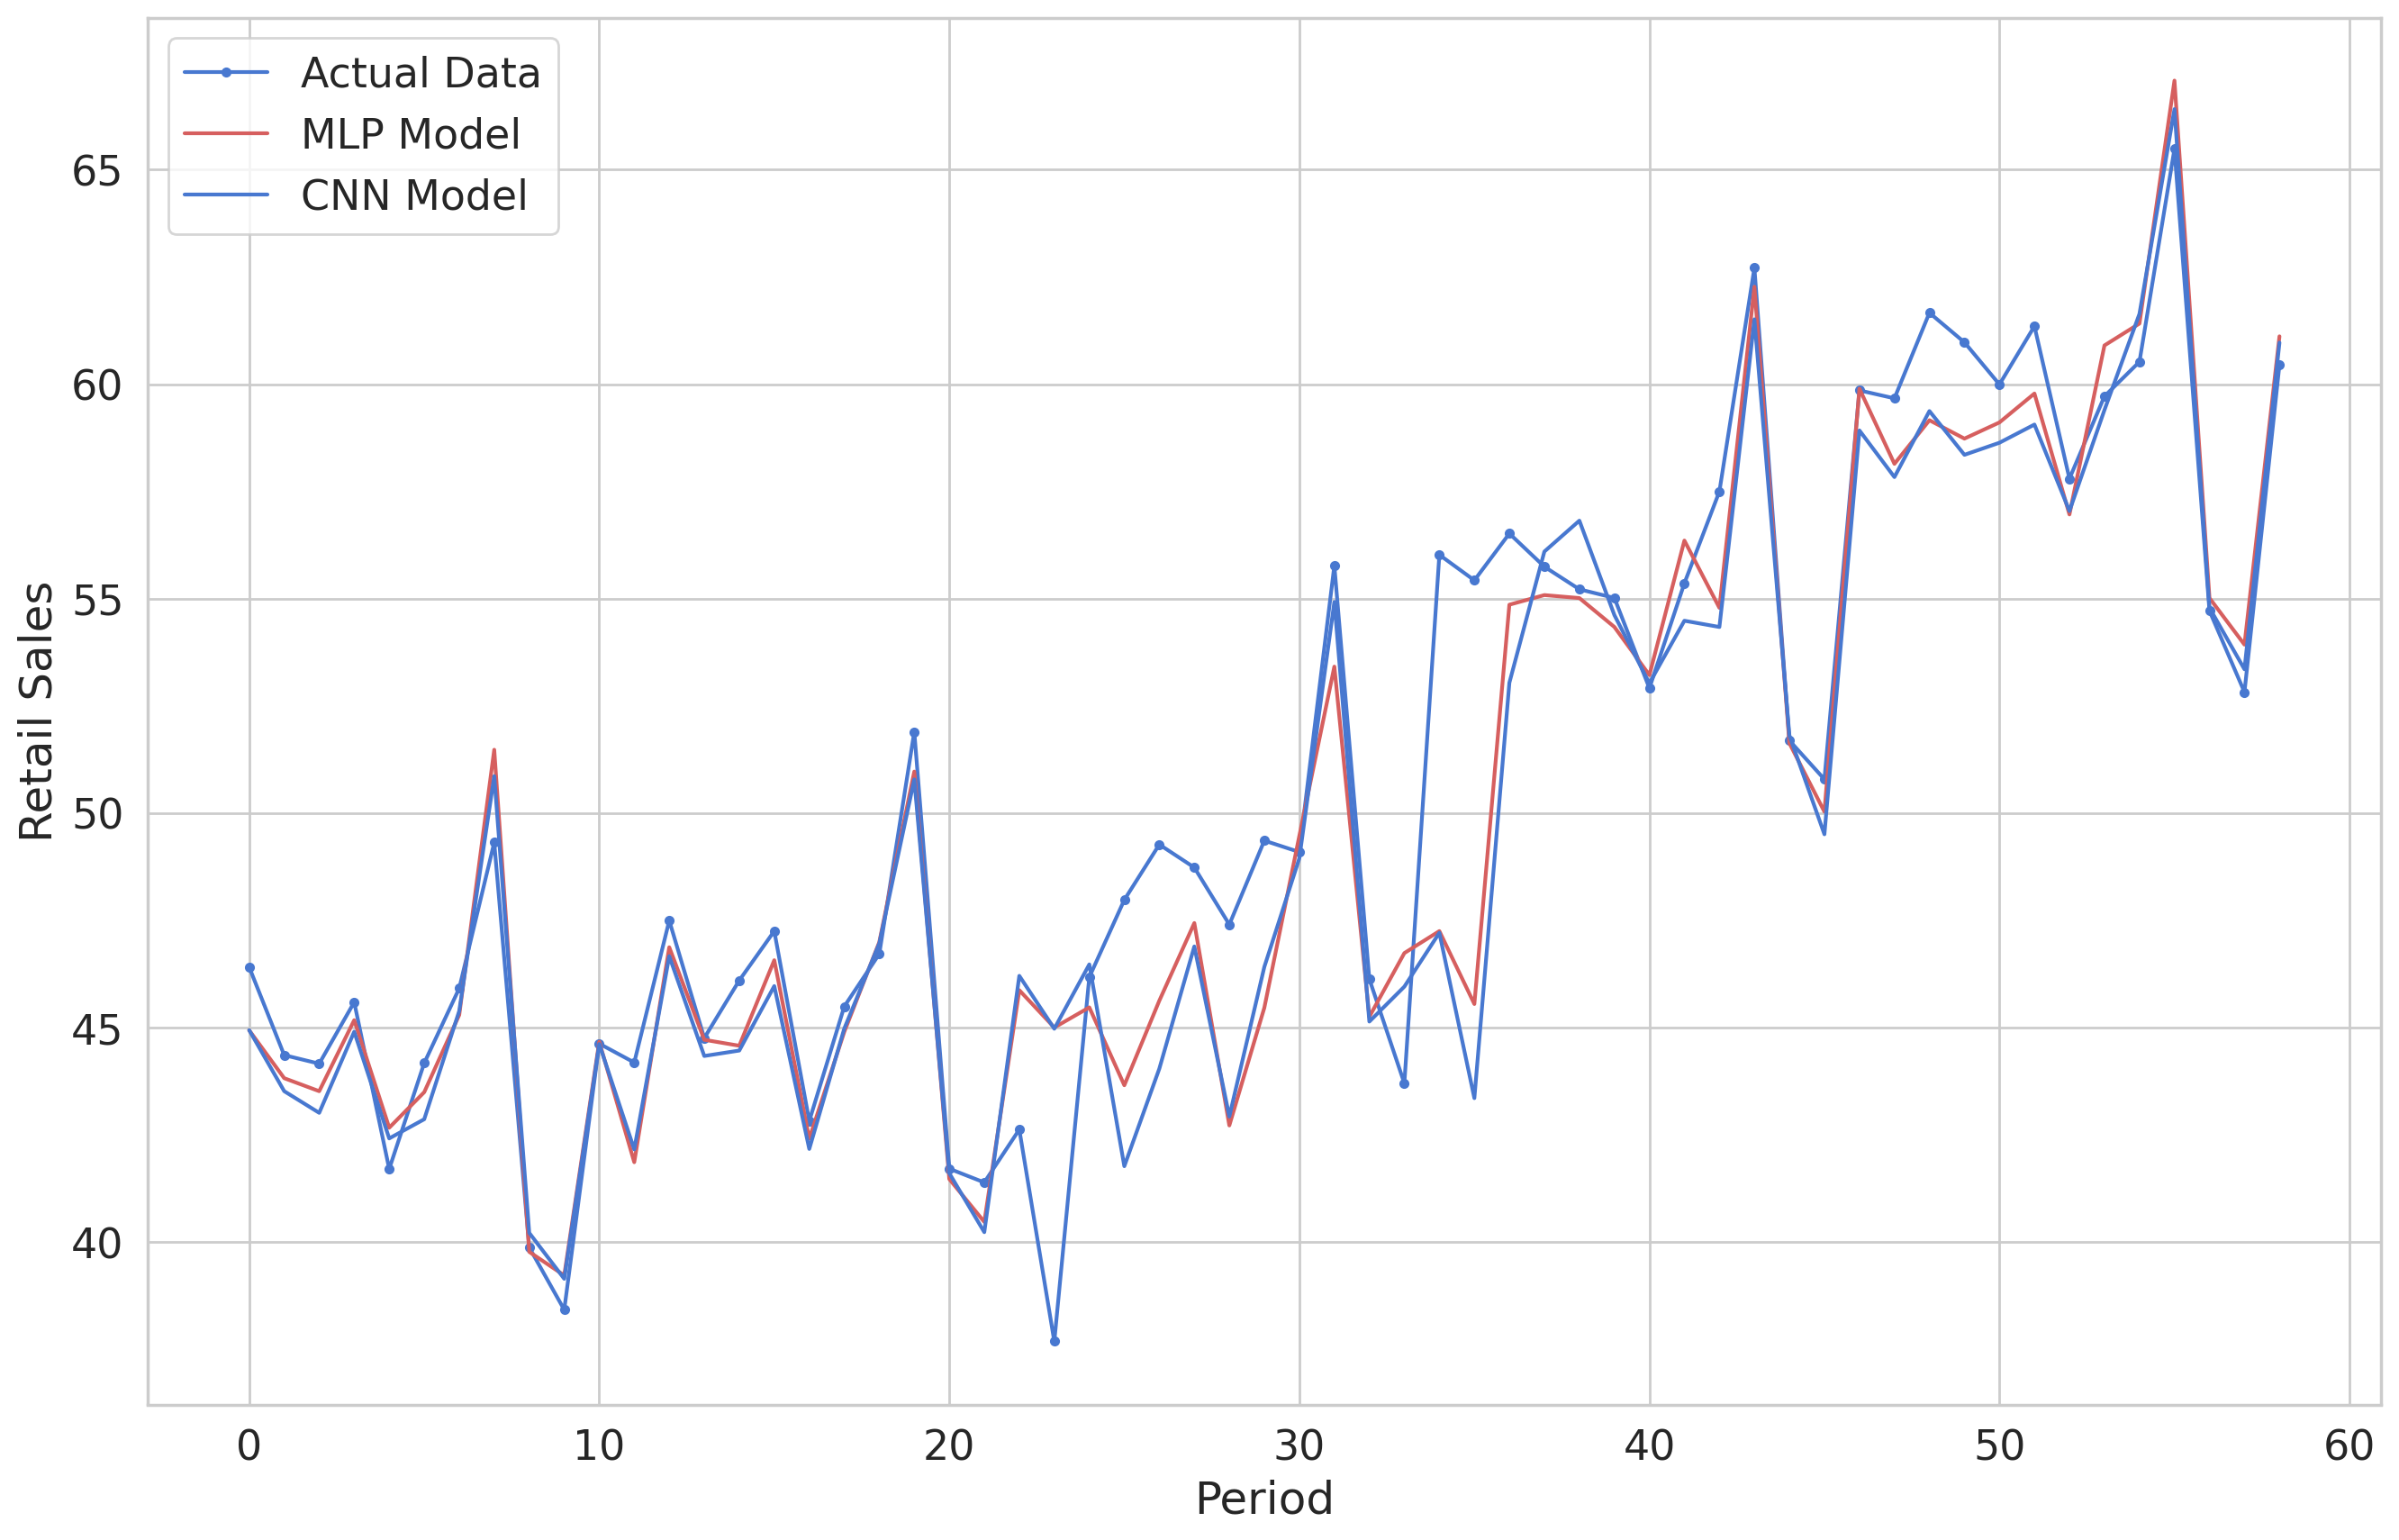

In [49]:
plt.plot(y_test, marker='.', label="Actual Data")
plt.plot(y_pred, 'r', label="MLP Model")
plt.plot(y_pred_cnn, 'b', label="CNN Model")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show()